# SARIMA (Example)

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("HospitalityEmployees.csv", index_col= 0, parse_dates= True)

In [6]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [7]:
df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=348, freq=None)

In [8]:
df.index.freq = "MS"

In [9]:
df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=348, freq='MS')

<AxesSubplot:xlabel='Date'>

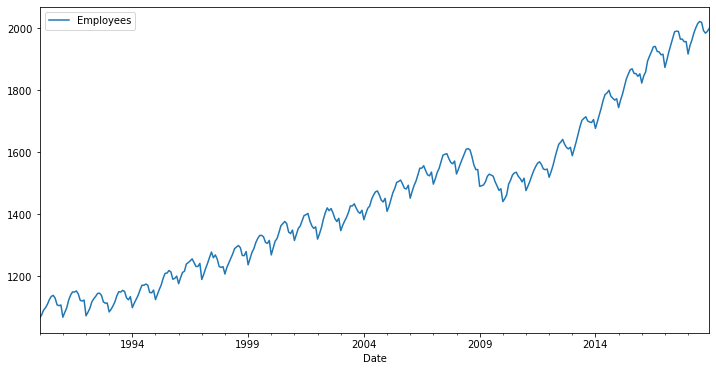

In [10]:
df.plot(figsize= (12,6))

### ETS Decomposition:

In [11]:
decomp = seasonal_decompose(df["Employees"], model= "additive")

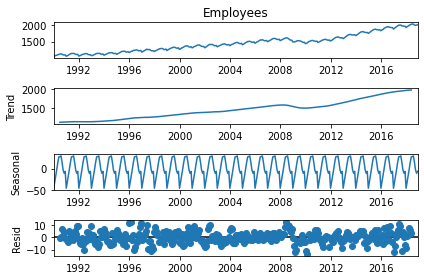

In [13]:
decomp.plot();

### Order Selection by Auto Arima:

In [15]:
grid_arima = auto_arima(df["Employees"],seasonal= 12, m= 12, trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2214.387, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2974.636, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2707.381, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2980.790, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2340.936, Time=0.58 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2327.595, Time=1.70 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.91 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2264.870, Time=1.65 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.80 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2210.598, Time=1.05 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2703.0

In [16]:
grid_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 24 Nov 2022   AIC                           2208.504
Time:                                      15:00:59   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train Test Split:

In [17]:
df.shape

(348, 1)

In [18]:
train_data = df[:-24]

In [19]:
test_data = df[-24:]

In [20]:
train_data.shape

(324, 1)

In [21]:
test_data.shape

(24, 1)

### SARIMAX(1, 1, 2)(1, 0, 1, 12) Model:

In [22]:
model = SARIMAX(train_data["Employees"], order=(1,1,2), seasonal_order=(1,0,1,12))

In [23]:
result = model.fit()

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  324
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1017.185
Date:                              Thu, 24 Nov 2022   AIC                           2046.369
Time:                                      15:03:56   BIC                           2069.035
Sample:                                  01-01-1990   HQIC                          2055.417
                                       - 12-01-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9201      0.045     20.516      0.000       0.832       1.008
ma.L1         -0.9578      0.072    -13.288      0.000      -1.099      -0.817
ma.L2          0.1613      0.062      2.596      0.009       0.040       0.283
ar.S.L12       0.9971      0.001    681.174      0.000       0.994       1.000
ma.S.L12      -0.7464      0.047    -15.964      0.000      -0.838      -0.655
sigma2        28.1560      1.628     17.292      0.000      24.965      31.347
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                87.83
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.17
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predictions:

In [25]:
start = len(train_data)
end = len(train_data) + len(test_data) -1

In [26]:
preds = result.predict(start= start, end= end, typ= "levels")

In [27]:
preds

2017-01-01    1885.637555
2017-02-01    1905.303930
2017-03-01    1921.948620
2017-04-01    1947.066891
2017-05-01    1967.147246
2017-06-01    1983.131183
2017-07-01    1992.536639
2017-08-01    1996.267661
2017-09-01    1980.735981
2017-10-01    1974.703287
2017-11-01    1967.443238
2017-12-01    1972.874859
2018-01-01    1941.566580
2018-02-01    1961.295644
2018-03-01    1978.002172
2018-04-01    2003.149218
2018-05-01    2023.264739
2018-06-01    2039.288179
2018-07-01    2048.745185
2018-08-01    2052.537756
2018-09-01    2037.117101
2018-10-01    2031.162873
2018-11-01    2023.979922
2018-12-01    2029.447742
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

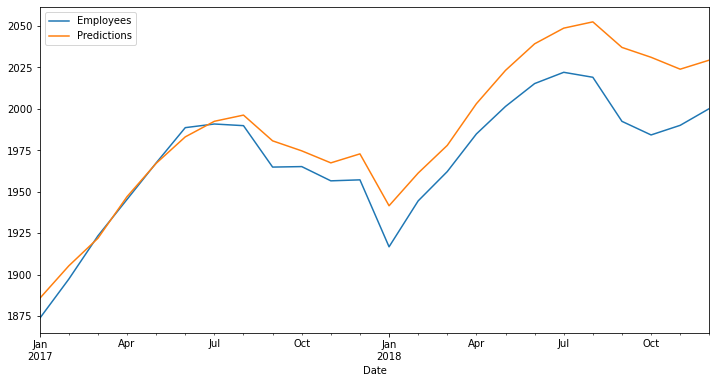

In [28]:
# Plotting Test Data and Predictions:

test_data["Employees"].plot(figsize= (12,6), legend= True)
preds.plot(label= "Predictions", legend= True)

In [29]:
# Model Evaluation:

np.sqrt(mean_squared_error(test_data["Employees"], preds))

21.926030457400085

In [30]:
test_data["Employees"].mean()

1968.9166666666667

### Training Model on Full Data and Future Predictions:

In [31]:
final_model = SARIMAX(df["Employees"], order=(1,1,2), seasonal_order=(1,0,1,12))

In [32]:
result = final_model.fit()

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 24 Nov 2022   AIC                           2208.504
Time:                                      15:09:34   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
forecast = result.predict(start= len(df), end= len(df)+23, typ= "levels")

In [35]:
forecast

2019-01-01    1963.876381
2019-02-01    1986.811315
2019-03-01    2005.990827
2019-04-01    2030.323614
2019-05-01    2050.305235
2019-06-01    2067.131599
2019-07-01    2074.910484
2019-08-01    2076.477995
2019-09-01    2056.894510
2019-10-01    2051.833006
2019-11-01    2047.915000
2019-12-01    2053.881163
2020-01-01    2018.360688
2020-02-01    2041.063200
2020-03-01    2060.033480
2020-04-01    2084.154381
2020-05-01    2103.947127
2020-06-01    2120.603466
2020-07-01    2128.246877
2020-08-01    2129.704845
2020-09-01    2110.078828
2020-10-01    2104.941564
2020-11-01    2100.951384
2020-12-01    2106.824035
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

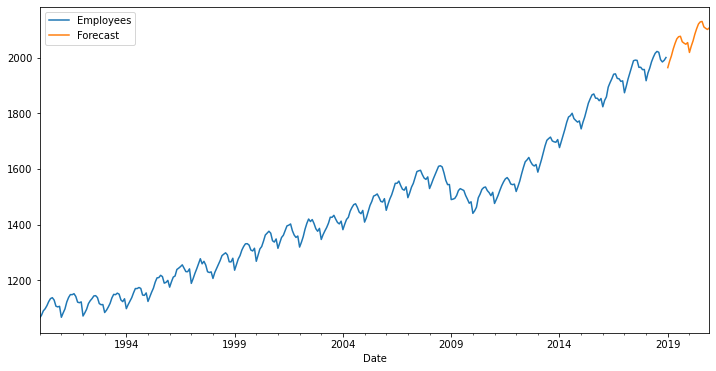

In [36]:
# Plotting Historic Data and Forecast:

df["Employees"].plot(figsize= (12,6), legend= True)
forecast.plot(label= "Forecast", legend= True)